In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')






/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.4 MB/s 
/bin/bash: conda: command not found
Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [5]:
csv_file.close()

In [6]:
manchester_raw = pd.read_csv('manchester.csv')

In [7]:
manchester_raw.shape

(63, 1)

In [8]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399432,-2.294060
1,Barlow Moor,53.426562,-2.266241
2,"Belle Vue, Manchester",53.463060,-2.197180
3,Benchill,53.389117,-2.265841
4,"Beswick, Manchester",53.483804,-2.215091


In [12]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


#Latitude and Longitude of Manchester.

In [13]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


#plot map of Manchester using latitude and longitude values.

In [14]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map


#apply FourSquare API in all the neighbourhoods on Manchester.

In [15]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


#create a dataframe for performing clustering.

In [17]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.399432,-2.29406,Lidl,Supermarket,53.400455,-2.295649
1,Baguley,53.399432,-2.29406,B&M Store,Furniture / Home Store,53.401589,-2.299105
2,Baguley,53.399432,-2.29406,Costa Coffee,Coffee Shop,53.400795,-2.295027
3,Baguley,53.399432,-2.29406,Aldi,Supermarket,53.401268,-2.299659
4,Baguley,53.399432,-2.29406,McDonald's,Fast Food Restaurant,53.400461,-2.289088


#one-hot encoding to analyze neighbourhoods of Manchester.

In [18]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Afghan Restaurant,Airport Service,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cricket Ground,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gelato Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pier,Pizza Place,Polish Restaurant,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Tour Provider,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yemeni Restaurant
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#agregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [19]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Afghan Restaurant,Airport Service,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cricket Ground,Cultural Center,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Forest,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gelato Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Korean Restaurant,Lake,Lebanese Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,Newsagent,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pier,Pizza Place,Polish Restaurant,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,Sandwich Place,Science Museum,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Tour Provider,Toy / Game Store,Track Stadium,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yemeni Restaurant
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.266667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.0,0.142857,0.071429,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0

In [20]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

#Now we will create a new dataframe to get the top 10 venues.

In [21]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Garden,Pet Store,Fast Food Restaurant,Clothing Store,Gym / Fitness Center,Coffee Shop,Hardware Store,Furniture / Home Store
1,Barlow Moor,Grocery Store,Middle Eastern Restaurant,Gym,Bus Station,Outdoor Supply Store,Fish & Chips Shop,Fast Food Restaurant,Park,Golf Course,Forest
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Pharmacy,Convenience Store,Track Stadium,Gym,Fast Food Restaurant,Restaurant,Movie Theater,Market
3,Benchill,Tram Station,Pub,Bus Station,Supermarket,Boat or Ferry,Market,Bakery,Bus Stop,Pie Shop,Physical Therapist
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Gym / Fitness Center,Soccer Stadium,Brewery,Supermarket,Sporting Goods Shop,Grocery Store,Cocktail Bar


#Now we will apply K-means clustering on the dataframe.

In [22]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [24]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

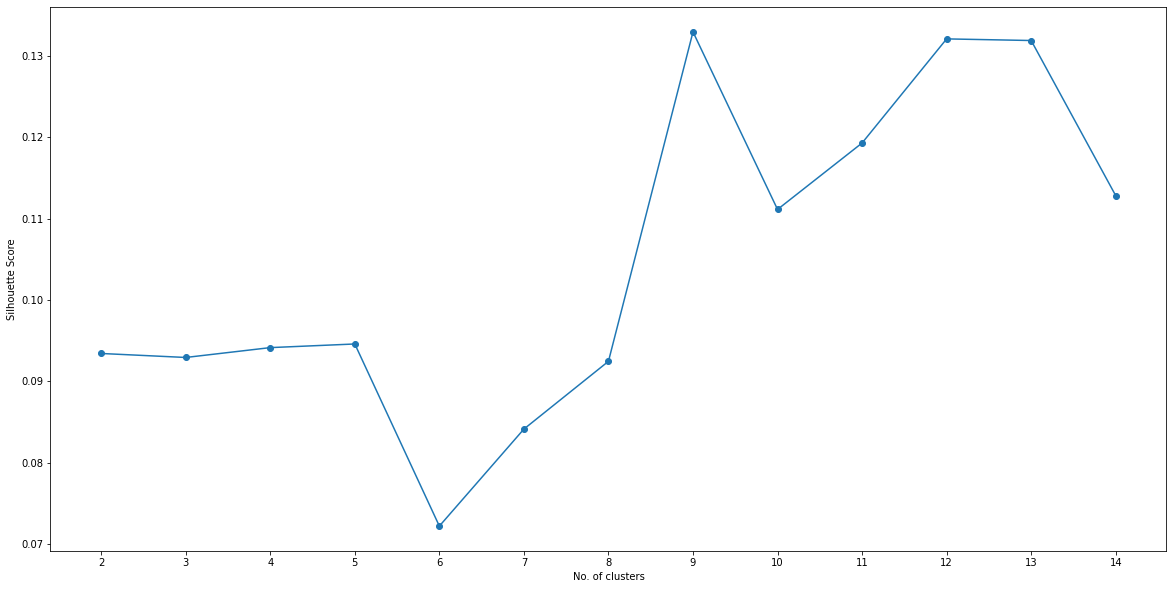

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

#graph the optimal number is found to be 8 using the Elbow Method

In [26]:
opt_value = 8

#Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [27]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [28]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399432,-2.294060,7,Tram Station,Supermarket,Garden,Pet Store,Fast Food Restaurant,Clothing Store,Gym / Fitness Center,Coffee Shop,Hardware Store,Furniture / Home Store
1,Barlow Moor,53.426562,-2.266241,3,Grocery Store,Middle Eastern Restaurant,Gym,Bus Station,Outdoor Supply Store,Fish & Chips Shop,Fast Food Restaurant,Park,Golf Course,Forest
2,"Belle Vue, Manchester",53.463060,-2.197180,3,Supermarket,Grocery Store,Pharmacy,Convenience Store,Track Stadium,Gym,Fast Food Restaurant,Restaurant,Movie Theater,Market
3,Benchill,53.389117,-2.265841,7,Tram Station,Pub,Bus Station,Supermarket,Boat or Ferry,Market,Bakery,Bus Stop,Pie Shop,Physical Therapist
4,"Beswick, Manchester",53.483804,-2.215091,5,Coffee Shop,Bar,Italian Restaurant,Gym / Fitness Center,Soccer Stadium,Brewery,Supermarket,Sporting Goods Shop,Grocery Store,Cocktail Bar


In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [31]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Pub,Coffee Shop,Outdoors & Recreation,Park,Grocery Store,Performing Arts Venue,Music Venue,Nature Preserve,Newsagent,Optical Shop
25,Great Heaton,Pub,Coffee Shop,Park,Italian Restaurant,Polish Restaurant,Pastry Shop,Music Venue,Nature Preserve,Newsagent,Optical Shop


In [32]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Brooklands (Manchester ward),Pub,Hotel,Restaurant,Italian Restaurant,Polish Restaurant,Gay Bar,Multiplex,Science Museum,Tea Room,Concert Hall
11,Castlefield,Hotel,Pub,Bar,Escape Room,Mini Golf,Coffee Shop,Gastropub,Spanish Restaurant,Café,Comedy Club
40,New Moston,Hotel,Pub,Soccer Stadium,Convenience Store,Supermarket,Tram Station,Train Station,Malay Restaurant,Park,Music Venue
51,"Ringway, Greater Manchester",Pub,Hotel,Restaurant,Italian Restaurant,Polish Restaurant,Gay Bar,Multiplex,Science Museum,Tea Room,Concert Hall
55,"St John's, Manchester",Cocktail Bar,Hotel,Pub,Restaurant,Steakhouse,Hotel Bar,Portuguese Restaurant,Pizza Place,Science Museum,Concert Hall


In [33]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Bradford-with-Beswick,Tram Station,Athletics & Sports,Lounge,Track Stadium,Pier,Fish & Chips Shop,Soccer Stadium,Canal,Sporting Goods Shop,Park
7,"Bradford, Manchester",Tram Station,Athletics & Sports,Lounge,Track Stadium,Pier,Fish & Chips Shop,Soccer Stadium,Canal,Sporting Goods Shop,Park
36,Miles Platting,Tram Station,Canal,Men's Store,Tennis Court,Thai Restaurant,Afghan Restaurant,Park,Music Venue,Nature Preserve,Newsagent
42,Newton Heath,Supermarket,Shoe Store,Tram Station,Canal,Park,Fast Food Restaurant,Gymnastics Gym,Bus Stop,Athletics & Sports,Pharmacy


In [34]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Grocery Store,Middle Eastern Restaurant,Gym,Bus Station,Outdoor Supply Store,Fish & Chips Shop,Fast Food Restaurant,Park,Golf Course,Forest
2,"Belle Vue, Manchester",Supermarket,Grocery Store,Pharmacy,Convenience Store,Track Stadium,Gym,Fast Food Restaurant,Restaurant,Movie Theater,Market
13,Chorlton (ward),Grocery Store,Indian Restaurant,Falafel Restaurant,Coffee Shop,Pet Store,Fish & Chips Shop,Restaurant,Spanish Restaurant,Cricket Ground,Park
14,Chorlton Park (ward),Grocery Store,Park,Indian Restaurant,Coffee Shop,Pizza Place,Convenience Store,Tapas Restaurant,Food & Drink Shop,Fish & Chips Shop,Thai Restaurant
17,Chorltonville,Grocery Store,Indian Restaurant,Falafel Restaurant,Coffee Shop,Pet Store,Fish & Chips Shop,Restaurant,Spanish Restaurant,Cricket Ground,Park
32,Levenshulme,Indian Restaurant,Grocery Store,Pharmacy,Fast Food Restaurant,Gym / Fitness Center,Farmers Market,Chinese Restaurant,Sandwich Place,Fried Chicken Joint,Café
33,Longsight,Grocery Store,Supermarket,Park,Fast Food Restaurant,Pharmacy,Pastry Shop,Market,College Cafeteria,Dessert Shop,Turkish Restaurant
35,Merseybank,Bus Station,Grocery Store,Indian Restaurant,Forest,Hotel,Lake,Outdoor Supply Store,Fast Food Restaurant,Golf Course,Middle Eastern Restaurant
44,Northern Moor,Grocery Store,Fast Food Restaurant,Tram Station,Monument / Landmark,Bowling Green,Chinese Restaurant,Park,Convenience Store,Athletics & Sports,Soccer Field
59,"Whalley Range, Manchester",Bar,Grocery Store,Park,Stadium,Soccer Field,Caribbean Restaurant,Chinese Restaurant,Shop & Service,Sandwich Place,Tibetan Restaurant


In [35]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Cheetham, Manchester",Coffee Shop,Brewery,Fast Food Restaurant,Pharmacy,Grocery Store,Clothing Store,Sporting Goods Shop,Furniture / Home Store,Soccer Field,Shopping Plaza
20,Collyhurst,Pharmacy,Clothing Store,Coffee Shop,Tram Station,Sporting Goods Shop,Furniture / Home Store,Shopping Plaza,Park,Fast Food Restaurant,Soccer Field
21,Crumpsall,Coffee Shop,Tram Station,Supermarket,Snack Place,Park,Grocery Store,Sandwich Place,Halal Restaurant,Ice Cream Shop,Pharmacy
29,Highfield Country Park,Gym,Fast Food Restaurant,Café,Pizza Place,English Restaurant,Supermarket,Bakery,Bar,Smoke Shop,Grocery Store
41,Newall Green,Coffee Shop,Pub,Furniture / Home Store,Bus Stop,Newsagent,Convenience Store,Tram Station,Sandwich Place,Performing Arts Venue,Optical Shop
53,"Smedley, Manchester",Fast Food Restaurant,Clothing Store,Coffee Shop,Tram Station,Pharmacy,Concert Hall,Soccer Field,Furniture / Home Store,Sporting Goods Shop,Museum
56,"Strangeways, Manchester",Coffee Shop,Grocery Store,Brewery,Clothing Store,Pharmacy,Music Venue,Food Court,Park,Gym / Fitness Center,Persian Restaurant
61,Woodhouse Park,Coffee Shop,Discount Store,Hotel,Sandwich Place,Bus Station,Rental Car Location,Fast Food Restaurant,Supermarket,Tanning Salon,Park


In [36]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Coffee Shop,Bar,Italian Restaurant,Gym / Fitness Center,Soccer Stadium,Brewery,Supermarket,Sporting Goods Shop,Grocery Store,Cocktail Bar
15,Chorlton-cum-Hardy,Café,Pizza Place,Bar,Pub,Park,Coffee Shop,Deli / Bodega,Thai Restaurant,Spanish Restaurant,Cocktail Bar
16,Chorlton-on-Medlock,Café,Chinese Restaurant,Halal Restaurant,Supermarket,Middle Eastern Restaurant,Indian Restaurant,Coffee Shop,Dessert Shop,Falafel Restaurant,Fast Food Restaurant
18,Circle Square Manchester,Pub,Restaurant,Fast Food Restaurant,Gay Bar,Café,Bakery,Bar,Theater,College Arts Building,Coffee Shop
22,Didsbury,Pub,Park,Italian Restaurant,Bar,Indian Restaurant,Café,Coffee Shop,Tea Room,Burger Joint,Supermarket
23,Fallowfield,Pub,Bar,Asian Restaurant,Fast Food Restaurant,Park,Hotel,Supermarket,Vegetarian / Vegan Restaurant,Chinese Restaurant,Indian Restaurant
26,Green Quarter,Pub,Food Court,Music Venue,Bar,Hotel,Brewery,Gym / Fitness Center,Escape Room,Pizza Place,Coffee Shop
27,"Greenheys, Manchester",Music Venue,Bar,Chinese Restaurant,Café,Coffee Shop,Pub,Art Gallery,Sandwich Place,Lounge,Performing Arts Venue
30,Hulme,Pub,Hotel,Bar,Café,Theater,Restaurant,Concert Hall,College Arts Building,Coffee Shop,Gastropub
31,Ladybarn,Pub,Bar,Sandwich Place,Indian Restaurant,Asian Restaurant,Fast Food Restaurant,Supermarket,Hotel,Greek Restaurant,Fish & Chips Shop


In [37]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Burnage,Train Station,Grocery Store,Supermarket,Golf Course,Coffee Shop,Gym / Fitness Center,Chinese Restaurant,Toy / Game Store,Rental Car Location,Motorcycle Shop
10,Burnage (ward),Train Station,Grocery Store,Supermarket,Golf Course,Coffee Shop,Gym / Fitness Center,Chinese Restaurant,Toy / Game Store,Rental Car Location,Motorcycle Shop
24,Gorton,Train Station,Discount Store,Park,Go Kart Track,Gymnastics Gym,Market,Chinese Restaurant,Bakery,Supermarket,Hotel
38,"Moston, Manchester",Gym / Fitness Center,Park,Supermarket,Hotel,Flea Market,Optical Shop,Fast Food Restaurant,Shopping Mall,Nature Preserve,Newsagent
57,"Victoria Park, Manchester",Supermarket,Pizza Place,Dance Studio,Bakery,Sandwich Place,Fast Food Restaurant,Park,Bus Stop,Golf Course,Pub
58,West Gorton,Train Station,Sandwich Place,Discount Store,Café,Electronics Store,Hookah Bar,Bus Station,Chinese Restaurant,Climbing Gym,Persian Restaurant


In [38]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Garden,Pet Store,Fast Food Restaurant,Clothing Store,Gym / Fitness Center,Coffee Shop,Hardware Store,Furniture / Home Store
3,Benchill,Tram Station,Pub,Bus Station,Supermarket,Boat or Ferry,Market,Bakery,Bus Stop,Pie Shop,Physical Therapist
19,"Clayton, Manchester",Discount Store,Supermarket,Tram Station,Pub,Gym / Fitness Center,Coffee Shop,Park,Shopping Mall,Clothing Store,Grocery Store
28,Harpurhey,Park,Hotel,Supermarket,Flea Market,Optical Shop,Tram Station,Shopping Mall,Fast Food Restaurant,Gym / Fitness Center,Afghan Restaurant
48,Openshaw,Supermarket,Discount Store,Coffee Shop,Grocery Store,Gym / Fitness Center,Clothing Store,Go Kart Track,Farmers Market,Pet Store,Train Station
50,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Bakery,Discount Store,Deli / Bodega,Hotel,Supermarket,Tanning Salon,Market,Fish & Chips Shop
52,Sharston,Airport Service,Tram Station,Supermarket,Café,Bus Station,Pier,Outdoors & Recreation,Music Venue,Pool,Nature Preserve


##After studying all four clusters, it is recommended to the client that neighbourhoods such as Barlow Moor, Brookelands and Hyde Newton(Ward) that fall in cluster 4 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project.